In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/home/thomas/code/imitation-learning-codebase/drone_gate_pics/291_2.jpg'
#path = '/home/thomas/code/imitation-learning-codebase/drone_gate_pics/2_2.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(image.shape)
cut_off = 335
image[848-cut_off:848, :] = np.zeros((cut_off, 800))

(848, 800)


NameError: name 'find_peaks' is not defined

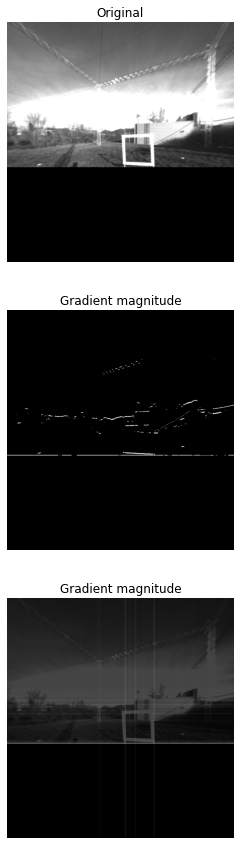

In [3]:
from scipy import signal

from scipy import misc

#filter operation
vert_filt = np.array([[ -1, 0,  1],[-2, 0 , 2],[ -1, 0,  1]]) 
hor_filt = np.array([[ -1, -2,  -1],[0, 0 , 0],[ 1, 2,  1]])
vert_edge = signal.convolve2d(image, vert_filt, boundary='symm', mode='same')
hor_edge = signal.convolve2d(image, hor_filt, boundary='symm', mode='same')

vert_edge = (vert_edge > 200)
hor_edge = (hor_edge > 200)
borders = np.zeros((16,32))
borders[1:2,:] = 256
borders[15:16,:] = 256
row_sum = np.sum(np.abs(hor_edge), axis=1)
col_sum = np.sum(np.abs(vert_edge), axis=0)
plot_val = np.zeros((848,800))
for i in range(len(row_sum)):
    plot_val[i,:] = row_sum[i]
plot_val2 = np.zeros((848,800))
for i in range(len(col_sum)):
    plot_val2[:,i] = col_sum[i]
    
fig, (ax_orig, ax_ver, ax_hor) = plt.subplots(3, 1, figsize=(6, 15))

ax_orig.imshow(image, cmap='gray')

ax_orig.set_title('Original')

ax_orig.set_axis_off()

ax_ver.imshow(hor_edge, cmap='gray')

ax_ver.set_title('Gradient magnitude')

ax_ver.set_axis_off()


ax_hor.imshow(plot_val2 + plot_val + image, cmap='gray')

ax_hor.set_title('Gradient magnitude')

ax_hor.set_axis_off()
peak_col = find_peaks(col_sum)
peak_row = find_peaks(row_sum)
print(peak_col)
print(peak_row)


In [4]:
def find_peaks(a):
  copy_arr = np.array(a)
  max_idx = np.argmax(a)
  copy_arr[max_idx] = 0
  second_found = False
  cntr = len(a)
  while not second_found and cntr >0:
      second_idx = np.argmax(copy_arr)
      if a[second_idx+1] > a[second_idx] or a[second_idx-1] > a[second_idx]:
        copy_arr[second_idx] = 0
      else:
        second_found = True
        
      cntr -=1
  return np.array([max_idx,second_idx])
